In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter # type: ignore
from netCDF4 import Dataset
import h5netcdf
import matplotlib.animation as animation
import os
import glob
from datetime import datetime
from IPython.display import HTML

In [2]:
directory = "data/2024/27/"
data1 = directory + "Z__C_RJTD_etop_20240827060000.nc"
data2 = directory + "Z__C_RJTD_rain_20240827060000.nc"

e = xr.open_dataset(data1)
r = xr.open_dataset(data2)
etop = e["etop"]
rain = r["rain"]
etopKU = float(etop.sel(lat= 35.03, lon= 135.78, method='nearest'))
rainKU = float(rain.sel(lat= 35.03, lon= 135.78, method='nearest'))

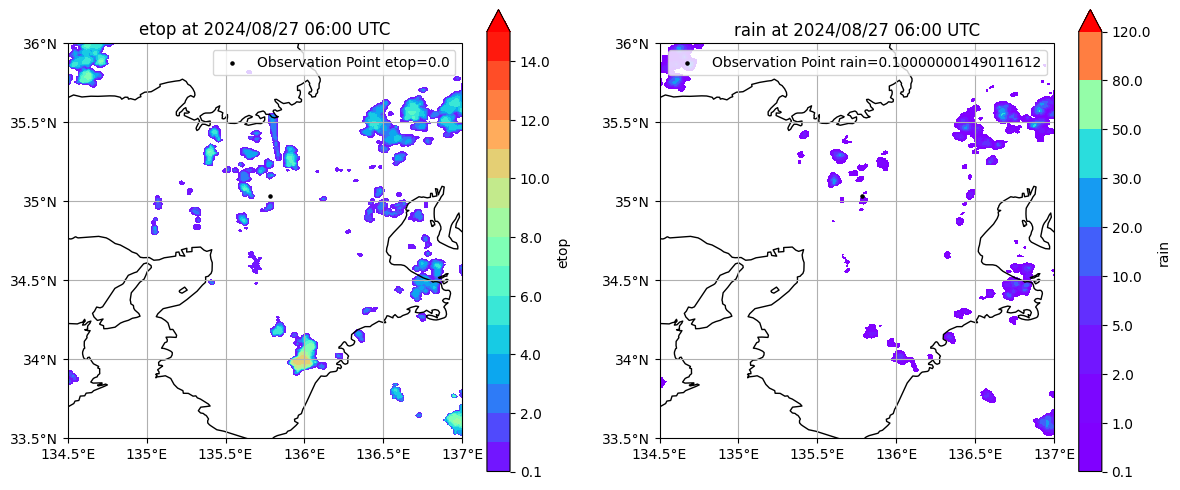

In [3]:
clevels1 = np.arange(1,15.1, 1) # 塗りつぶし用
clevels1 = np.append(0.1, clevels1)
clevels2 = np.array([0.1,1,2,5,10,20,30,50,80,120])
#clevels2 = np.arange(0.1,120)

# ファイル名から時刻を抽出
filename = os.path.basename(data1)
time_str = filename.split('_')[-1].replace('.nc', '')
time_obj = datetime.strptime(time_str, '%Y%m%d%H%M%S')
time_formatted = time_obj.strftime('%Y/%m/%d %H:%M UTC')

# 描画
fig = plt.figure(figsize=(14,6))

# (1) 領域を用意（地図投影オプションをつけて）

# PlateCaree: 正距円筒図法, central_longitude: 図の中心の経度
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree(central_longitude=180))
ax2 = fig.add_subplot(122,projection=ccrs.PlateCarree(central_longitude=180))

# (2) 図を描く
lon_etop = etop.lon.values
lat_etop = etop.lat.values
etop_data = etop.values[0, :, :]
contour1 = ax1.contourf(lon_etop, lat_etop, etop_data, levels=clevels1, extend='max', cmap='rainbow', transform=ccrs.PlateCarree())
cb1 = plt.colorbar(contour1, ax=ax1, label='etop')

lon_rain = rain.lon.values
lat_rain = rain.lat.values
rain_data = rain.values[0, :, :]
contour2 = ax2.contourf(lon_rain, lat_rain, rain_data, levels=clevels2, extend='max', cmap='rainbow', transform=ccrs.PlateCarree())
cb2 = plt.colorbar(contour2, ax=ax2, label='rain')

# (4) 描画領域の設定
ax1.set_extent([134.5,137,33.5,36],crs=ccrs.PlateCarree())
ax2.set_extent([134.5,137,33.5,36],crs=ccrs.PlateCarree())

# (3) 目盛り（表示範囲に合わせて設定）
xticks = np.arange(134.5, 137.5, 0.5)  # 0.5度間隔
yticks = np.arange(33.5, 36.5, 0.5)    # 0.5度間隔
ax1.set_xticks(xticks, crs=ccrs.PlateCarree())
ax1.set_yticks(yticks, crs=ccrs.PlateCarree())
ax2.set_xticks(xticks, crs=ccrs.PlateCarree())
ax2.set_yticks(yticks, crs=ccrs.PlateCarree())
##　地図投影用の書式を設定（演習では無視（あるいはコピー）してもらって良い）
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
# 目盛りラベルを表示
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

# (5) オプション
ax1.coastlines() #海岸線
ax1.gridlines(draw_labels=False) #罫線：ラベルはすでに上で描いたので"False"
ax2.coastlines() #海岸線
ax2.gridlines(draw_labels=False)

KU_latitude = 35.03
KU_longitude = 135.78

# ax1（左側の図）に点を追加
ax1.scatter(KU_longitude, KU_latitude, color='black', s=5, transform=ccrs.PlateCarree(), label=f'Observation Point etop={etopKU}')

# ax2（右側の図）にも点を追加
ax2.scatter(KU_longitude, KU_latitude, color='black', s=5, transform=ccrs.PlateCarree(), label=f'Observation Point rain={rainKU}')
# 凡例を追加（オプション）
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

ax1.set_title(f'etop at {time_formatted}')
ax2.set_title(f'rain at {time_formatted}')

plt.show()

In [4]:
# ディレクトリ内のすべてのetopとrainファイルを取得
directory = "data/2025/08/25/"
etop_files = sorted(glob.glob(os.path.join(directory, "Z__C_RJTD_etop_*.nc")))
rain_files = sorted(glob.glob(os.path.join(directory, "Z__C_RJTD_rain_*.nc")))

print(len(etop_files), len(rain_files))

# 最初の50個を切り出し
# etop_files = etop_files[:50]
# rain_files = rain_files[:50]
print(len(etop_files), len(rain_files))

144 144
144 144


In [ ]:
# 観測地点の設定
KU_latitude = 35.03
KU_longitude = 135.78

# カラーレベルの設定
clevels1 = np.arange(1, 15.1, 1)  # etop用
clevels1 = np.append(0.1, clevels1)
clevels2 = np.array([0.1, 1, 2, 5, 10, 20, 30, 50, 80, 120])  # rain用

# 【最適化】事前にすべてのデータを読み込んでキャッシュ
print("データを読み込み中...")
cached_data = []
for i, (etop_file, rain_file) in enumerate(zip(etop_files, rain_files)):
    # データを読み込み
    e = xr.open_dataset(etop_file)
    r = xr.open_dataset(rain_file)
    
    # ファイル名から時刻を抽出
    filename = os.path.basename(etop_file)
    time_str = filename.split('_')[-1].replace('.nc', '')
    time_formatted = datetime.strptime(time_str, '%Y%m%d%H%M%S').strftime('%Y/%m/%d %H:%M UTC')
    
    # 必要なデータのみ抽出してキャッシュ
    etop = e["etop"]
    rain = r["rain"]
    
    cached_data.append({
        'time': time_formatted,
        'lon_etop': etop.lon.values,
        'lat_etop': etop.lat.values,
        'etop_data': etop.values[0, :, :],
        'lon_rain': rain.lon.values,
        'lat_rain': rain.lat.values,
        'rain_data': rain.values[0, :, :],
        'etopKU': float(etop.sel(lat=KU_latitude, lon=KU_longitude, method='nearest')),
        'rainKU': float(rain.sel(lat=KU_latitude, lon=KU_longitude, method='nearest'))
    })
    
    e.close()
    r.close()
    
    if (i + 1) % 10 == 0:
        print(f"  {i + 1}/{len(etop_files)} ファイル読み込み完了")

print("データ読み込み完了！アニメーションを作成中...")

# アニメーション用の図を作成（サイズを大きくして余白を確保）
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree(central_longitude=180))
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree(central_longitude=180))

def update_frame(frame_num):
    """各フレームを更新する関数（最適化版：キャッシュから読み込み）"""
    ax1.clear()
    ax2.clear()
    
    # キャッシュからデータを取得（ファイルI/Oなし）
    data = cached_data[frame_num]
    
    # 左側: etop
    contour1 = ax1.contourf(data['lon_etop'], data['lat_etop'], data['etop_data'], 
                            levels=clevels1, extend='max', cmap='rainbow', 
                            transform=ccrs.PlateCarree())
    
    # 右側: rain
    contour2 = ax2.contourf(data['lon_rain'], data['lat_rain'], data['rain_data'], 
                            levels=clevels2, extend='max', cmap='rainbow', 
                            transform=ccrs.PlateCarree())
    
    # 描画領域の設定
    ax1.set_extent([134.5, 137, 33.5, 36], crs=ccrs.PlateCarree())
    ax2.set_extent([134.5, 137, 33.5, 36], crs=ccrs.PlateCarree())
    
    # 目盛りの設定
    xticks = np.arange(134.5, 137.5, 0.5)
    yticks = np.arange(33.5, 36.5, 0.5)
    ax1.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax1.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax2.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax2.set_yticks(yticks, crs=ccrs.PlateCarree())
    
    # 地図投影用の書式を設定
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax2.xaxis.set_major_formatter(lon_formatter)
    ax2.yaxis.set_major_formatter(lat_formatter)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    # 海岸線と罫線
    ax1.coastlines()
    ax1.gridlines(draw_labels=False)
    ax2.coastlines()
    ax2.gridlines(draw_labels=False)
    
    # 観測地点を追加
    ax1.scatter(KU_longitude, KU_latitude, color='black', s=5, 
               transform=ccrs.PlateCarree(), 
               label=f'Observation Point etop={data["etopKU"]:.2f}')
    ax2.scatter(KU_longitude, KU_latitude, color='black', s=5, 
               transform=ccrs.PlateCarree(), 
               label=f'Observation Point rain={data["rainKU"]:.2f}')
    
    # 凡例とタイトル
    ax1.legend(loc='upper right', fontsize=9)
    ax2.legend(loc='upper right', fontsize=9)
    ax1.set_title(f'etop at {data["time"]}', fontsize=11, pad=10)
    ax2.set_title(f'rain at {data["time"]}', fontsize=11, pad=10)
    
    return ax1, ax2


# 【サイズ削減】5フレームごとに表示（データ量を1/5に削減）
frame_step = 1  # この値を変更してフレーム数を調整
subset_indices = list(range(0, len(cached_data), frame_step))

print(f"フレーム数: {len(subset_indices)}/{len(cached_data)} (1/{frame_step}に削減)")

# アニメーションを作成（interval=500msで0.5秒ごとに更新）
anim = animation.FuncAnimation(fig, update_frame, frames=subset_indices, 
                              interval=500, blit=False, repeat=True)

# レイアウトを調整（上下左右の余白を確保）
plt.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.08, wspace=0.3)

print("アニメーション作成完了！HTML変換中...（数分かかります）")
HTML(anim.to_jshtml())

データを読み込み中...
  10/144 ファイル読み込み完了
  20/144 ファイル読み込み完了
  30/144 ファイル読み込み完了
  40/144 ファイル読み込み完了
  50/144 ファイル読み込み完了
  60/144 ファイル読み込み完了
  70/144 ファイル読み込み完了
  80/144 ファイル読み込み完了
  90/144 ファイル読み込み完了
  100/144 ファイル読み込み完了
  110/144 ファイル読み込み完了
  120/144 ファイル読み込み完了
  130/144 ファイル読み込み完了
  140/144 ファイル読み込み完了
データ読み込み完了！アニメーションを作成中...
フレーム数: 144/144 (1/1に削減)
アニメーション作成完了！HTML変換中...（数分かかります）


KeyboardInterrupt: 

キャッシュされたデータを使用します


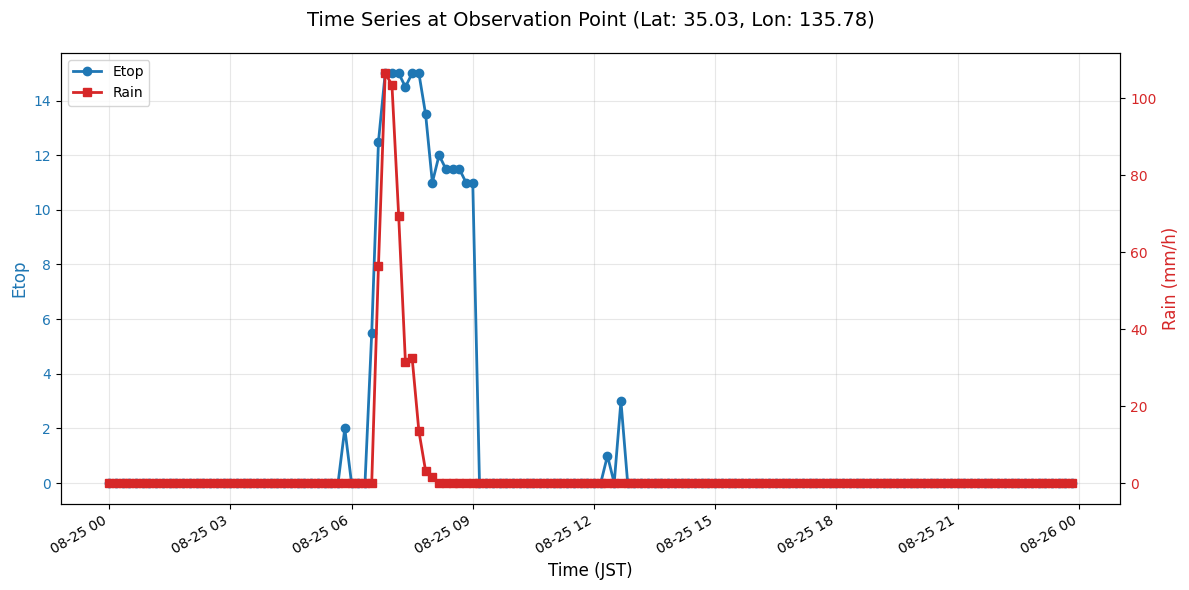


Etop - Min: 0.00, Max: 15.00, Mean: 1.43
Rain - Min: 0.00, Max: 106.50, Mean: 2.90


In [7]:
# 観測地点の設定
KU_latitude = 35.03
KU_longitude = 135.78

# 【最適化】cached_dataが存在しない場合は作成（第5セル未実行時対応）
if 'cached_data' not in locals():
    print("データを読み込み中...")
    cached_data = []
    for i, (etop_file, rain_file) in enumerate(zip(etop_files, rain_files)):
        # データを読み込み
        e = xr.open_dataset(etop_file)
        r = xr.open_dataset(rain_file)
        
        # ファイル名から時刻を抽出
        filename = os.path.basename(etop_file)
        time_str = filename.split('_')[-1].replace('.nc', '')
        time_formatted = datetime.strptime(time_str, '%Y%m%d%H%M%S').strftime('%Y/%m/%d %H:%M JST')
        
        # 必要なデータのみ抽出してキャッシュ
        etop = e["etop"]
        rain = r["rain"]
        
        cached_data.append({
            'time': time_formatted,
            'etopKU': float(etop.sel(lat=KU_latitude, lon=KU_longitude, method='nearest')),
            'rainKU': float(rain.sel(lat=KU_latitude, lon=KU_longitude, method='nearest'))
        })
        
        e.close()
        r.close()
        
        if (i + 1) % 10 == 0:
            print(f"  {i + 1}/{len(etop_files)} ファイル読み込み完了")
    
    print("データ読み込み完了！")
else:
    print("キャッシュされたデータを使用します")

# キャッシュからデータを抽出（ファイルI/Oなし）
times = []
etop_values = []
rain_values = []

for data in cached_data:
    times.append(datetime.strptime(data['time'], '%Y/%m/%d %H:%M UTC'))
    etop_values.append(data['etopKU'])
    rain_values.append(data['rainKU'])

# グラフを作成
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左側のy軸: etop
color1 = 'tab:blue'
ax1.set_xlabel('Time (JST)', fontsize=12)
ax1.set_ylabel('Etop', color=color1, fontsize=12)
line1 = ax1.plot(times, etop_values, color=color1, marker='o', label='Etop', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# 右側のy軸: rain
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Rain (mm/h)', color=color2, fontsize=12)
line2 = ax2.plot(times, rain_values, color=color2, marker='s', label='Rain', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)

# タイトル
plt.title(f'Time Series at Observation Point (Lat: {KU_latitude}, Lon: {KU_longitude})', 
          fontsize=14, pad=20)

# 凡例を統合
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

# x軸の日時フォーマットを調整
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# 統計情報を表示
print(f"\nEtop - Min: {np.min(etop_values):.2f}, Max: {np.max(etop_values):.2f}, Mean: {np.mean(etop_values):.2f}")
print(f"Rain - Min: {np.min(rain_values):.2f}, Max: {np.max(rain_values):.2f}, Mean: {np.mean(rain_values):.2f}")